In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "E6vZNTeSBS0kcfcsZkCQovPSQ"
Consumer_Secret_Key = "4qBc5DLs1uvRhd2lkrXhKiCze61jlBTQAZKZ5XBLS0tbhwjKvy" 
Access_Token = "1205070840666062848-ZI4OC5CHPJuB3zv9hjLXHOHDNyvEDZ"
Access_Token_Secret = "b6rYy1i5ciPG0CDnd2kTLN1K36ypZkXOKqpSgBSZqkLyp"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [9]:
posts = api.user_timeline(screen_name="Indonesia_G20", count = 2000, lang = "id", tweet_mode = "extended")

print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i=i+1

Show the 10 recent tweets: 

1) Hal ini juga merupakan kesempatan bagi Indonesia untuk berkontribusi lebih besar bagi pemulihan ekonomi dunia, membangun taat kelola dunia yang lebih sehat, lebih adil dan berkelanjutan.

#G20Indonesia #PulihBersama

2) Tahun ini, Indonesia dipercaya menjadi Presidensi G20 &amp; telah melakukan berbagai gelaran pertemuan selama hampir satu tahun. Secara substantif, Indonesia bersama negara lainnya berperan memberikan rekomendasi kebijakan dalam merespons krisis baik bagi negara sendiri maupun dunia.

3) Negara-negara yang tergabung dalam G20 merupakan gabungan antara negara-negara maju dan berkembang dengan kelas pendapatan menengah hingga tinggi.

#G20Indonesia #PulihBersama

4) G20 dibentuk untuk memecahkan permasalahan global dengan melibatkan negara-negara yang berperan penting di kancah internasional, khususnya secara ekonomi serta mewujudkan pertumbuhan global yang kuat, berkelanjutan, seimbang, dan inklusif.

#G20Indonesia #PulihBersama https://t.

In [6]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Hal ini juga merupakan kesempatan bagi Indones...
1,"Tahun ini, Indonesia dipercaya menjadi Preside..."
2,Negara-negara yang tergabung dalam G20 merupak...
3,G20 dibentuk untuk memecahkan permasalahan glo...
4,Penyiapan PeduliLindungi dalam 13 bahasa merup...


In [7]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Hal ini juga merupakan kesempatan bagi Indones...
1,"Tahun ini, Indonesia dipercaya menjadi Preside..."
2,Negara-negara yang tergabung dalam G20 merupak...
3,G20 dibentuk untuk memecahkan permasalahan glo...
4,Penyiapan PeduliLindungi dalam 13 bahasa merup...
...,...
195,Pertemuan Ketiga Sherpa G20 telah berhasil dis...
196,"Selanjutnya, pada periode Presidensi G20 tahun..."
197,"Presidensi G20 Indonesia, salah satunya melalu..."
198,"Melalui pertemuan ini, negara anggota G20 berk..."


In [10]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Hal ini juga merupakan kesempatan bagi Indones...,0.0,0.0
1,"Tahun ini, Indonesia dipercaya menjadi Preside...",0.0,0.0
2,Negara-negara yang tergabung dalam G20 merupak...,0.0,0.0
3,G20 dibentuk untuk memecahkan permasalahan glo...,0.0,0.0
4,Penyiapan PeduliLindungi dalam 13 bahasa merup...,0.0,0.0
...,...,...,...
195,Pertemuan Ketiga Sherpa G20 telah berhasil dis...,0.0,0.0
196,"Selanjutnya, pada periode Presidensi G20 tahun...",0.0,0.0
197,"Presidensi G20 Indonesia, salah satunya melalu...",0.0,0.0
198,"Melalui pertemuan ini, negara anggota G20 berk...",0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

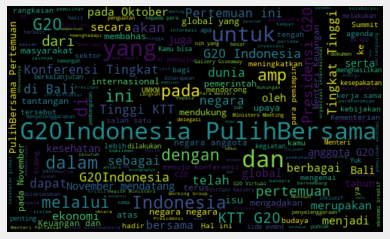

In [11]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [12]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Hal ini juga merupakan kesempatan bagi Indones...,0.0,0.0,Neutral
1,"Tahun ini, Indonesia dipercaya menjadi Preside...",0.0,0.0,Neutral
2,Negara-negara yang tergabung dalam G20 merupak...,0.0,0.0,Neutral
3,G20 dibentuk untuk memecahkan permasalahan glo...,0.0,0.0,Neutral
4,Penyiapan PeduliLindungi dalam 13 bahasa merup...,0.0,0.0,Neutral
...,...,...,...,...
195,Pertemuan Ketiga Sherpa G20 telah berhasil dis...,0.0,0.0,Neutral
196,"Selanjutnya, pada periode Presidensi G20 tahun...",0.0,0.0,Neutral
197,"Presidensi G20 Indonesia, salah satunya melalu...",0.0,0.0,Neutral
198,"Melalui pertemuan ini, negara anggota G20 berk...",0.0,0.0,Neutral


In [13]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

11) 3. Rapat Raksasa "Nyawiji" di Taman Lumbini Candi Borobudur
4. Parade Seni "Golong Gilig"

Diharapkan para delegasi dapat mengambil inspirasi praktik hidup berkelanjutan yang menjadi tradisi di Indonesia &amp; menjadikannya jawaban atas tantangan global seperti ekonomi &amp; lingkungan. 



In [ ]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199) The results and policy recommendations of all G20 meetings will be brought to the Heads of State and Government at the G20 Summit.


Stay tuned on  for more updates regarding G20 meetings and events. 
G20Indonesia RecoverTogetherRecoverStronger 

200) 1. establishing a fund for the future which was successfully done in June and July
2. establishing a formal mechanism on how we can use this fund to give equitable access to emergency medical countermeasures which are vaccines, therapeutics, and diagnostic tools  
G20Indonesia

201) Press Conference 

G20 2nd Health Ministers Meeting (HMM)
Bali, 27 October 2022

5 ambitious deliverables that Indonesia’s G20 Presidency would like to achieve, which became the main discussions during the previous Health Working Group (HWG) meetings:
G20Indonesia 

202) Find out more about G20 and this year’s G20 Presidency through this post. 
G20Indonesia RecoverTogetherRecoverStronger 

203) The G20 Summit 2022 is coming in l

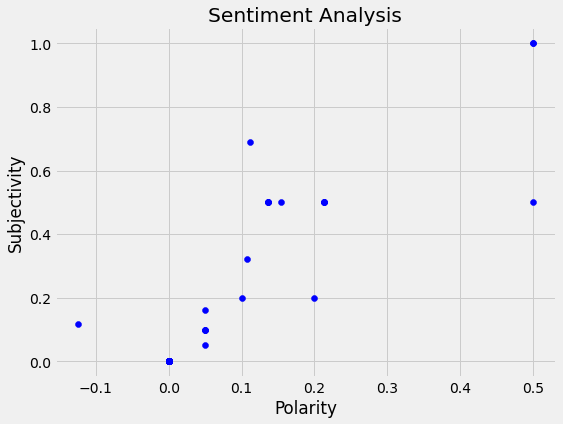

In [14]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

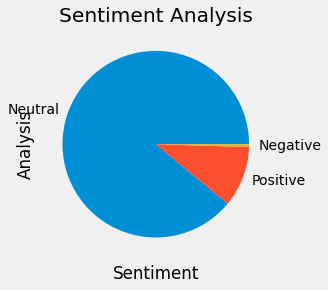

In [17]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()

In [18]:
df['Analysis'].value_counts()

Neutral     178
Positive     21
Negative      1
Name: Analysis, dtype: int64